In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_confusion_matrix

In [10]:
df = pd.read_csv("Data/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [11]:
data = df.drop(['index', 'Patient Id'], axis = 1)
data.head(3)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


In [13]:
print(data.isnull().sum())

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [8]:
#Encoding
data['Level'].replace(['Low','Medium','High'], [0,1,2], inplace = True)
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [14]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


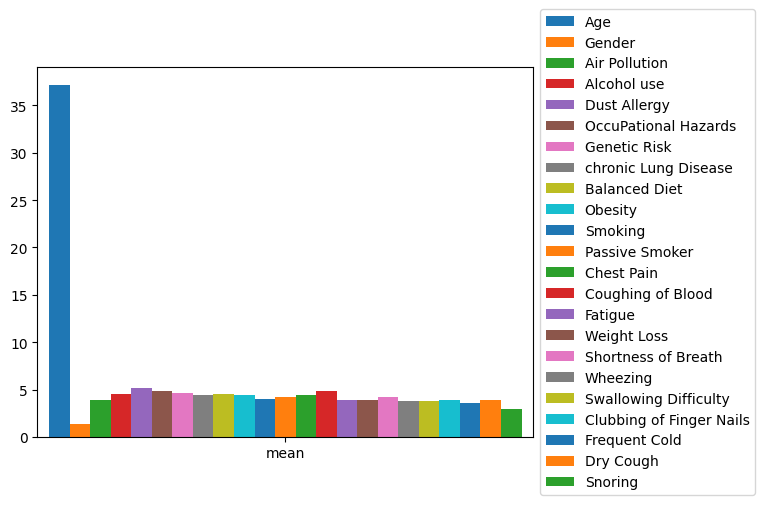

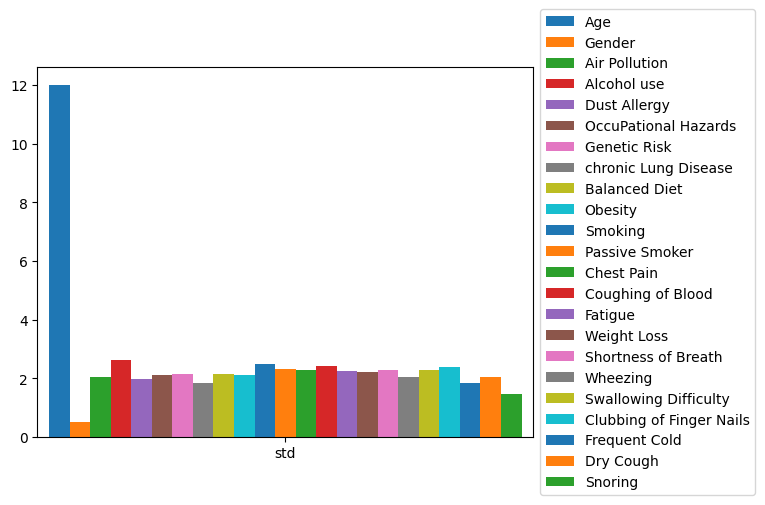

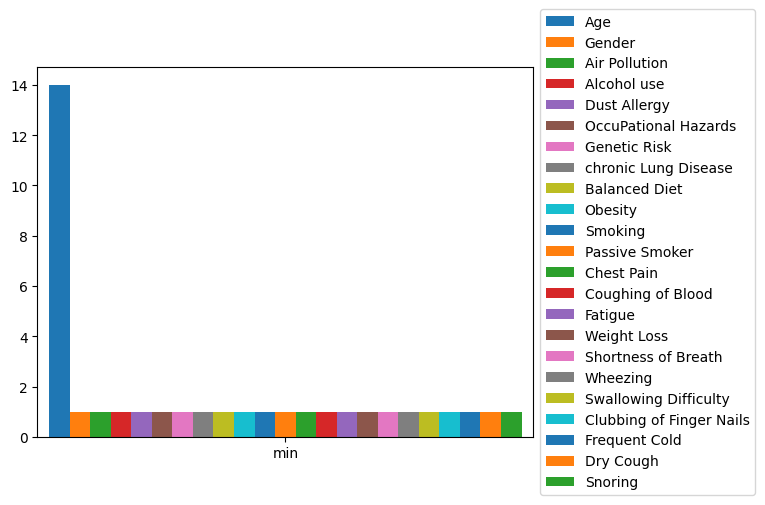

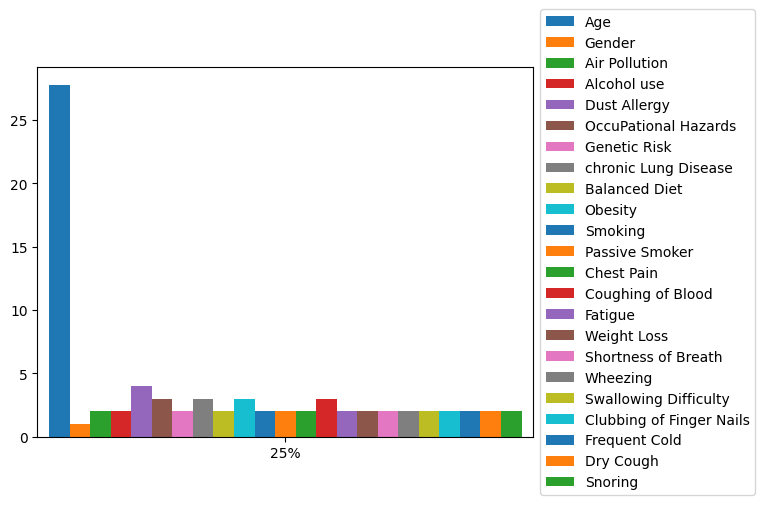

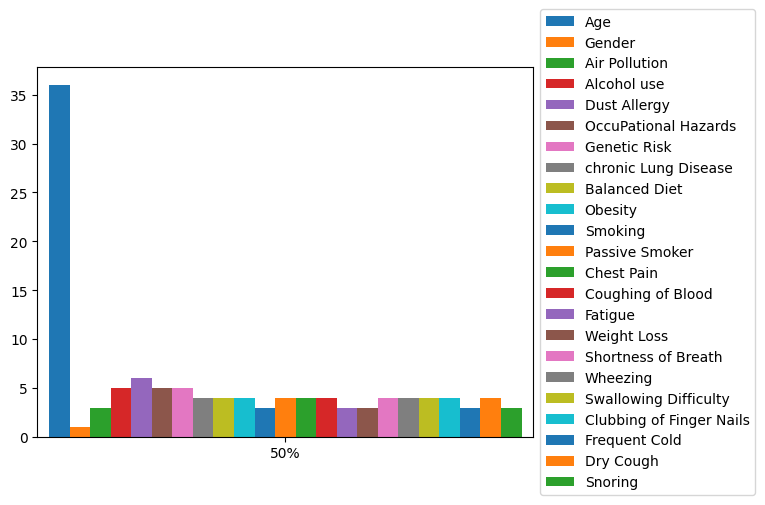

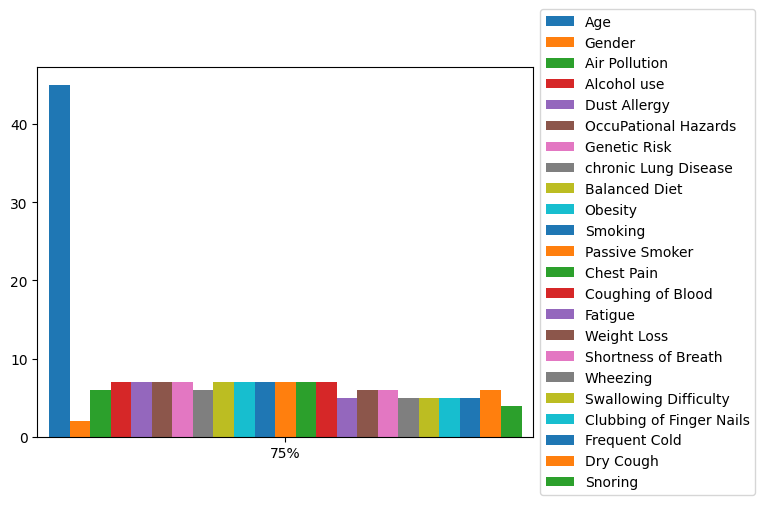

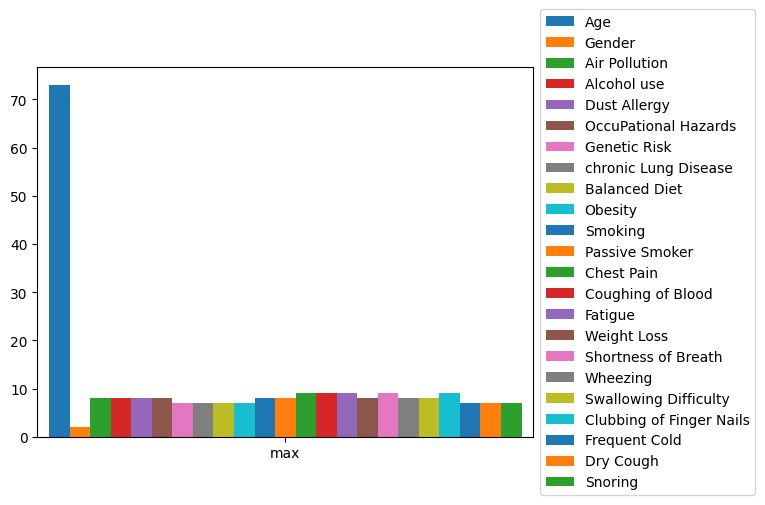

In [15]:
data.describe().loc[['mean']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

data.describe().loc[['std']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

data.describe().loc[['min']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

data.describe().loc[['25%']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

data.describe().loc[['50%']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

data.describe().loc[['75%']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

data.describe().loc[['max']].plot.bar(rot=0,width=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [16]:
target_col = df.groupby('Level').apply(len)
print(target_col)

Level
High      365
Low       303
Medium    332
dtype: int64


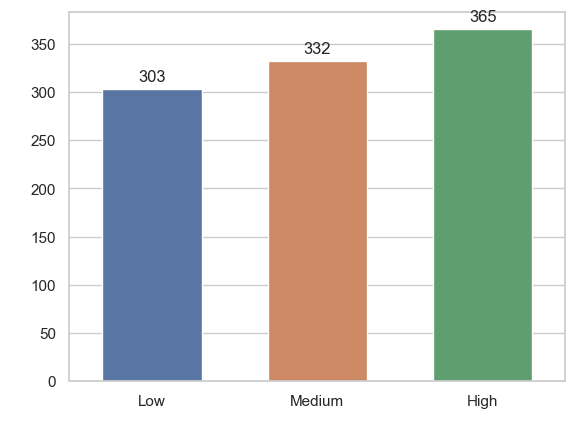

In [17]:
sns.set_theme(style="whitegrid")
splot=sns.countplot(x=df["Level"],width=0.6)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

In [18]:
X = data.drop(columns = 'Level')
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [19]:
Y = data['Level']
Y.head()

0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object

In [20]:
print(X.shape)
print(Y.shape)

(1000, 23)
(1000,)


### Train Test Spliting (10-Times)

In [14]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.30, random_state=1)

In [15]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(700, 23)
(700,)
(300, 23)
(300,)


In [16]:
x1_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
731,44,1,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
716,18,2,3,2,1,3,2,1,3,2,...,2,2,2,1,3,4,4,1,4,1
640,38,2,1,2,3,4,2,4,3,3,...,4,4,1,2,4,6,5,4,2,5
804,19,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
737,62,1,6,8,7,7,7,6,2,4,...,3,2,7,6,5,1,9,3,4,2


In [17]:
x1_test.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
507,45,2,1,2,3,4,2,4,3,3,...,4,4,1,2,4,6,5,4,2,5
818,26,1,2,3,1,4,3,2,3,4,...,3,1,2,3,4,5,1,2,3,4
452,35,2,4,5,6,5,6,5,5,5,...,5,1,4,3,2,4,6,2,4,1
368,24,2,3,2,2,1,1,1,1,1,...,6,2,1,2,3,4,2,1,1,1
242,24,1,6,8,7,7,6,7,7,3,...,6,5,2,5,2,3,2,1,7,6


In [18]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y, test_size = 0.30, random_state=2)

In [19]:
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(700, 23)
(700,)
(300, 23)
(300,)


In [20]:
x2_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
90,65,1,6,8,7,7,7,6,2,4,...,3,2,7,6,5,1,9,3,4,2
305,36,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
126,73,1,5,6,6,5,6,5,6,5,...,5,4,3,6,2,1,2,1,6,2
963,35,1,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
163,24,2,3,2,2,1,1,1,1,1,...,6,2,1,2,3,4,2,1,1,1


In [21]:
x2_test.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
37,28,1,6,7,8,7,6,7,7,2,...,8,2,3,6,4,2,3,1,2,1
726,62,1,3,2,1,3,2,4,5,1,...,2,4,3,2,1,2,4,2,3,2
846,32,1,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
295,33,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
924,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2


In [22]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X, Y, test_size = 0.30, random_state=3)

In [23]:
x3_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
926,32,1,2,3,6,7,7,7,7,2,...,4,2,1,3,2,2,1,2,5,1
411,46,2,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
224,32,1,2,3,6,7,7,7,7,2,...,4,2,1,3,2,2,1,2,5,1
14,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2
170,38,1,2,3,5,2,1,1,1,1,...,4,2,1,3,4,6,1,3,2,2


In [24]:
x3_test.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
642,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
762,37,1,6,7,7,7,7,7,6,7,...,7,8,5,7,6,7,8,7,6,2
909,53,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
199,33,1,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
586,42,1,2,4,5,6,5,5,4,6,...,3,8,7,7,3,8,9,1,6,2


In [25]:
x4_train, x4_test, y4_train, y4_test = train_test_split(X, Y, test_size = 0.30, random_state=4)

In [26]:
x4_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
715,38,2,3,2,3,2,3,2,3,2,...,1,1,2,3,2,5,1,5,1,1
920,32,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
295,33,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
83,36,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
942,38,2,5,2,3,1,2,3,5,2,...,3,1,1,1,1,1,3,2,4,2


In [27]:
x4_test.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
698,32,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
577,62,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
763,28,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
790,27,1,6,7,7,7,7,6,7,7,...,7,2,7,6,7,6,7,2,3,1
520,23,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4


In [28]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X, Y, test_size = 0.30, random_state=5)

In [29]:
x6_train, x6_test, y6_train, y6_test = train_test_split(X, Y, test_size = 0.30, random_state=6)

In [30]:
x7_train, x7_test, y7_train, y7_test = train_test_split(X, Y, test_size = 0.30, random_state=7)

In [31]:
x8_train, x8_test, y8_train, y8_test = train_test_split(X, Y, test_size = 0.30, random_state=8)

In [32]:
x9_train, x9_test, y9_train, y9_test = train_test_split(X, Y, test_size = 0.30, random_state=9)

In [33]:
x10_train, x10_test, y10_train, y10_test = train_test_split(X, Y, test_size = 0.30, random_state=10)

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

reg2 = LinearRegression()
reg2.fit(x2_train, y2_train)

reg3 = LinearRegression()
reg3.fit(x3_train, y3_train)

reg4 = LinearRegression()
reg4.fit(x4_train, y4_train)

reg5 = LinearRegression()
reg5.fit(x5_train, y5_train)

reg6 = LinearRegression()
reg6.fit(x6_train, y6_train)

reg7 = LinearRegression()
reg7.fit(x7_train, y7_train)

reg8 = LinearRegression()
reg8.fit(x8_train, y8_train)

reg9 = LinearRegression()
reg9.fit(x9_train, y9_train)

reg10 = LinearRegression()
reg10.fit(x10_train, y10_train)

LinearRegression()

In [35]:
y1_pred = reg1.predict(x1_test)
y2_pred = reg2.predict(x2_test)
y3_pred = reg3.predict(x3_test)
y4_pred = reg4.predict(x4_test)
y5_pred = reg5.predict(x5_test)
y6_pred = reg6.predict(x6_test)
y7_pred = reg7.predict(x7_test)
y8_pred = reg8.predict(x8_test)
y9_pred = reg9.predict(x9_test)
y10_pred = reg10.predict(x10_test)

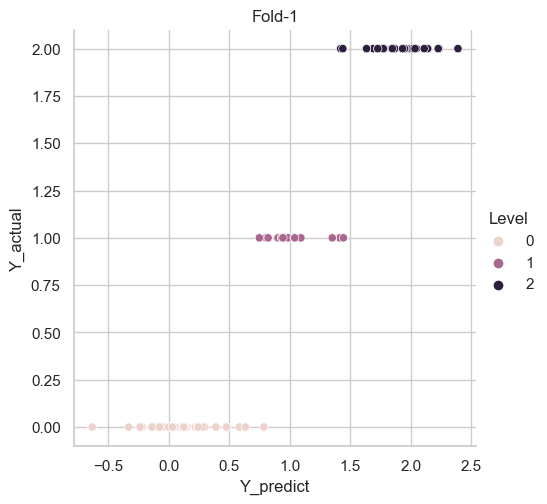

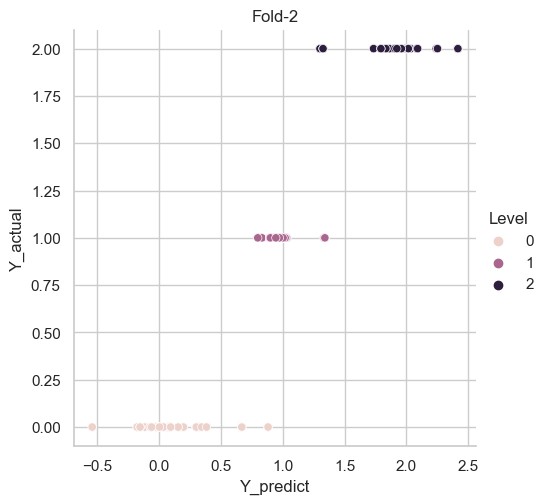

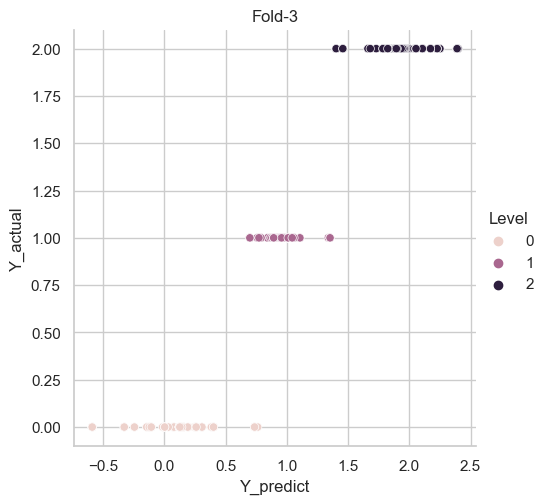

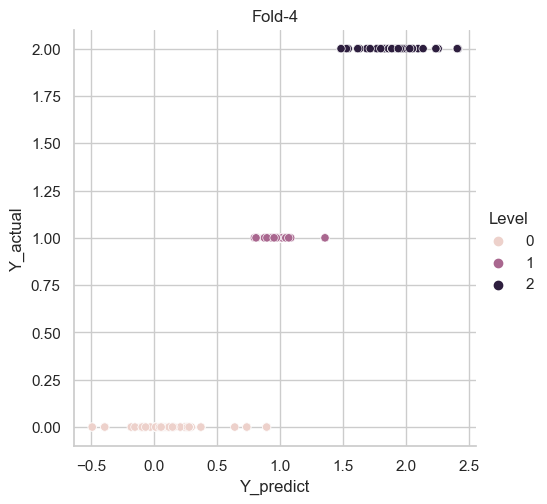

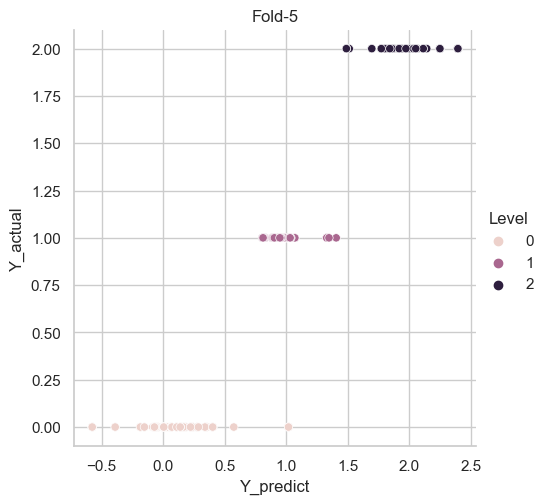

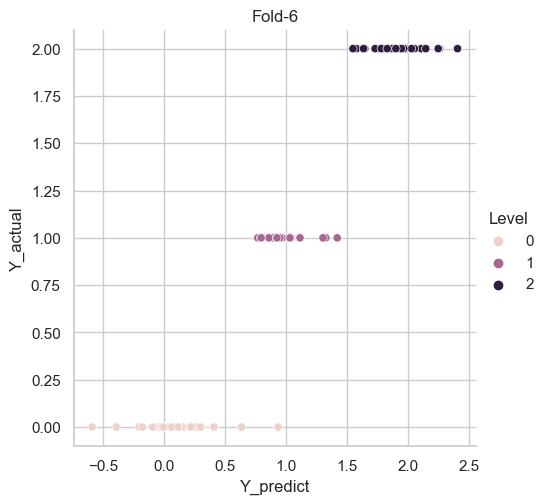

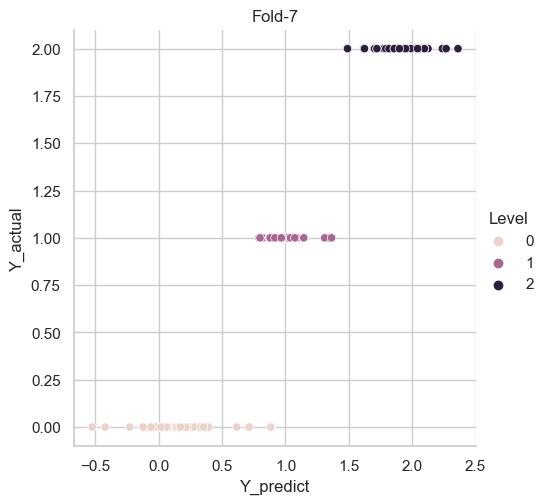

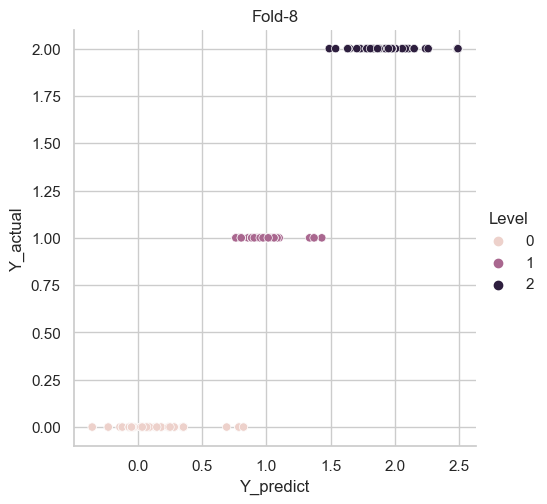

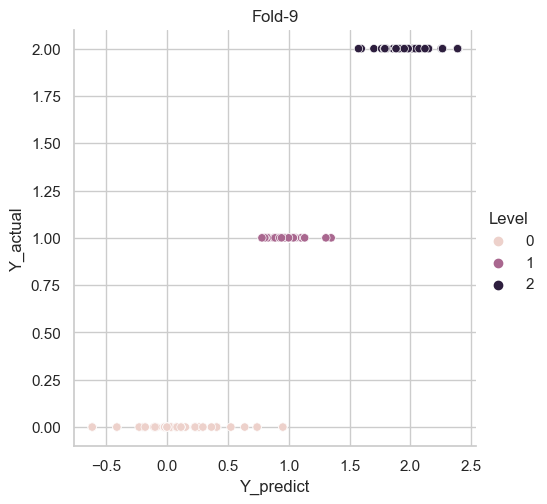

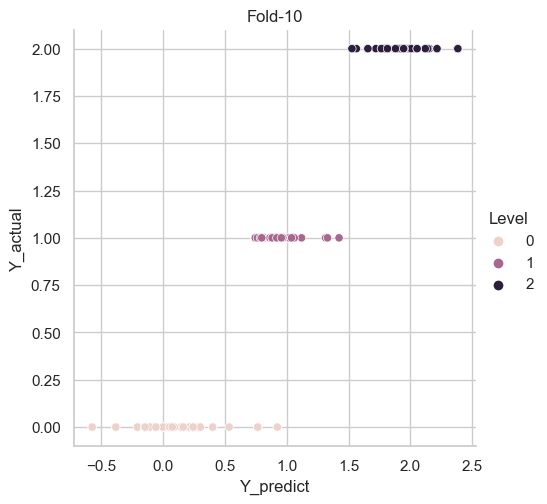

In [36]:
sns.relplot(x=y1_pred, y=y1_test, hue=y1_test)
plt.title("Fold-1")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y2_pred, y=y2_test, hue=y2_test)
plt.title("Fold-2")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y3_pred, y=y3_test, hue=y3_test)
plt.title("Fold-3")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y4_pred, y=y4_test, hue=y4_test)
plt.title("Fold-4")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y5_pred, y=y5_test, hue=y5_test)
plt.title("Fold-5")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y6_pred, y=y6_test, hue=y6_test)
plt.title("Fold-6")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y7_pred, y=y7_test, hue=y7_test)
plt.title("Fold-7")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y8_pred, y=y8_test, hue=y8_test)
plt.title("Fold-8")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y9_pred, y=y9_test, hue=y9_test)
plt.title("Fold-9")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y10_pred, y=y10_test, hue=y10_test)
plt.title("Fold-10")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")
plt.show()

In [37]:
a1 = r2_score(y1_test, y1_pred) 
print("Fold-1 Accuracy:", a1*100, "%")
a2 = r2_score(y2_test, y2_pred) 
print("Fold-2 Accuracy:", a2*100, "%")
a3 = r2_score(y3_test, y3_pred) 
print("Fold-3 Accuracy:", a3*100, "%")
a4 = r2_score(y4_test, y4_pred) 
print("Fold-4 Accuracy:", a4*100, "%")
a5 = r2_score(y5_test, y5_pred) 
print("Fold-5 Accuracy:", a5*100, "%")
a6 = r2_score(y6_test, y6_pred) 
print("Fold-6 Accuracy:", a6*100, "%")
a7 = r2_score(y7_test, y7_pred) 
print("Fold-7 Accuracy:", a7*100, "%")
a8 = r2_score(y8_test, y8_pred) 
print("Fold-8 Accuracy:", a8*100, "%")
a9 = r2_score(y9_test, y9_pred) 
print("Fold-9 Accuracy:", a9*100, "%")
a10 = r2_score(y10_test, y10_pred) 
print("Fold-10 Accuracy:", a10*100, "%")

Fold-1 Accuracy: 90.69709427688278 %
Fold-2 Accuracy: 90.80522419014991 %
Fold-3 Accuracy: 91.82853011655669 %
Fold-4 Accuracy: 92.60995310212506 %
Fold-5 Accuracy: 90.9019210114605 %
Fold-6 Accuracy: 92.53887142477642 %
Fold-7 Accuracy: 92.85593534323888 %
Fold-8 Accuracy: 92.15765260049753 %
Fold-9 Accuracy: 92.43850741395457 %
Fold-10 Accuracy: 90.75505563780996 %


In [38]:
accuracy = pd.DataFrame(columns=['Fold Number','Accuracy'])
accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':90.69709427688278},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':90.80522419014991},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':91.82853011655669},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-4', 'Accuracy':92.60995310212506},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-5', 'Accuracy':90.9019210114605},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-6', 'Accuracy':92.53887142477642},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-7', 'Accuracy':92.85593534323888},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-8', 'Accuracy':92.15765260049753},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-9', 'Accuracy':92.43850741395457},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-10', 'Accuracy':90.75505563780996},ignore_index=True)
accuracy.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2996647521.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':90.69709427688278},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2996647521.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':90.80522419014991},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2996647521.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':91.82853011655669},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2996647521.py:5: FutureWarning: The frame.append me

,Fold Number,Accuracy
0,Fold-1,90.697094
1,Fold-2,90.805224
2,Fold-3,91.828530
3,Fold-4,92.609953
4,Fold-5,90.901921
5,Fold-6,92.538871
6,Fold-7,92.855935
7,Fold-8,92.157653
8,Fold-9,92.438507
9,Fold-10,90.755056


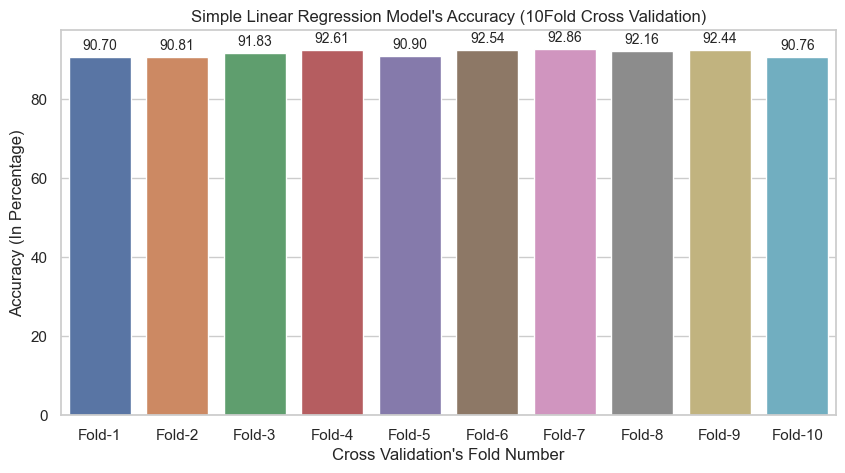

In [39]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x="Fold Number", y="Accuracy", data=accuracy)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Simple Linear Regression Model's Accuracy (10Fold Cross Validation)")
plt.xlabel("Cross Validation's Fold Number")
plt.ylabel("Accuracy (In Percentage)")
plt.show()

In [40]:
print('Simple Linear Regression Model Result')
print('-------------------------------------')
slr_mean = accuracy['Accuracy'].mean()
slr_median = accuracy['Accuracy'].median()

print('Mean accuracy:', slr_mean, '%')
print('Median accuracy:', slr_median, '%')

Simple Linear Regression Model Result
-------------------------------------
Mean accuracy: 91.75887451174523 %
Median accuracy: 91.99309135852711 %


### Decision Tree Classifier

In [41]:
from sklearn import tree

gin1 = tree.DecisionTreeClassifier(criterion = 'gini')
gin1.fit(x1_train, y1_train)

gin2 = tree.DecisionTreeClassifier(criterion = 'gini')
gin2.fit(x2_train, y2_train)

gin3 = tree.DecisionTreeClassifier(criterion = 'gini')
gin3.fit(x3_train, y3_train)

gin4 = tree.DecisionTreeClassifier(criterion = 'gini')
gin4.fit(x4_train, y4_train)

gin5 = tree.DecisionTreeClassifier(criterion = 'gini')
gin5.fit(x5_train, y5_train)

gin6 =tree.DecisionTreeClassifier(criterion = 'gini')
gin6.fit(x6_train, y6_train)

gin7 = tree.DecisionTreeClassifier(criterion = 'gini')
gin7.fit(x7_train, y7_train)

gin8 = tree.DecisionTreeClassifier(criterion = 'gini')
gin8.fit(x8_train, y8_train)

gin9 = tree.DecisionTreeClassifier(criterion = 'gini')
gin9.fit(x9_train, y9_train)

gin10 = tree.DecisionTreeClassifier(criterion = 'gini')
gin10.fit(x10_train, y10_train)

DecisionTreeClassifier()

In [42]:
y1_pred = gin1.predict(x1_test)
y2_pred = gin2.predict(x2_test)
y3_pred = gin3.predict(x3_test)
y4_pred = gin4.predict(x4_test)
y5_pred = gin5.predict(x5_test)
y6_pred = gin6.predict(x6_test)
y7_pred = gin7.predict(x7_test)
y8_pred = gin8.predict(x8_test)
y9_pred = gin9.predict(x9_test)
y10_pred = gin10.predict(x10_test)

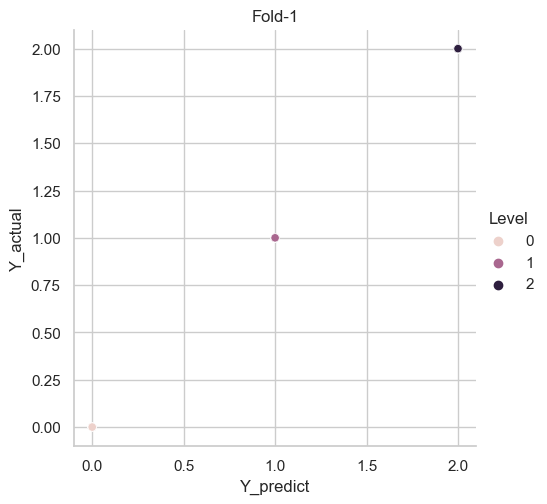

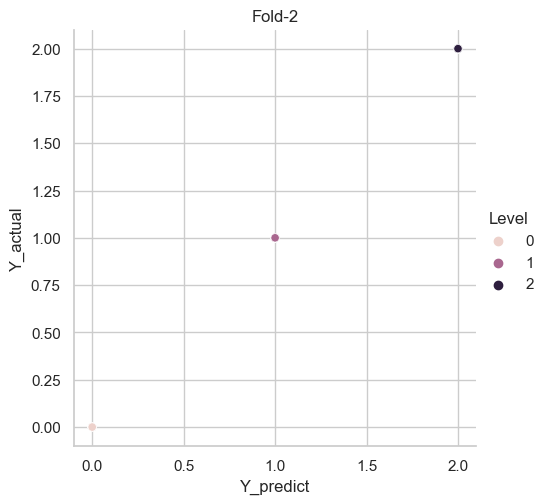

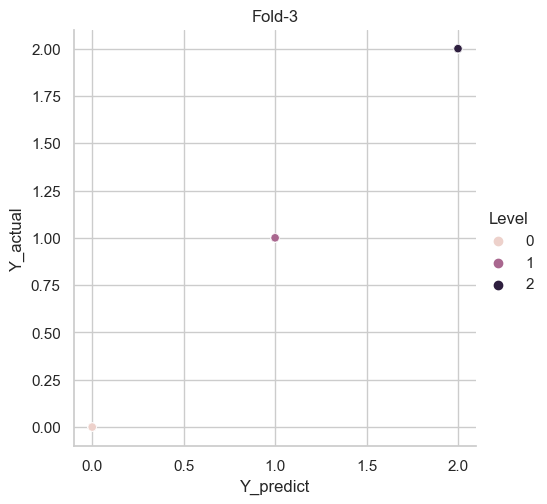

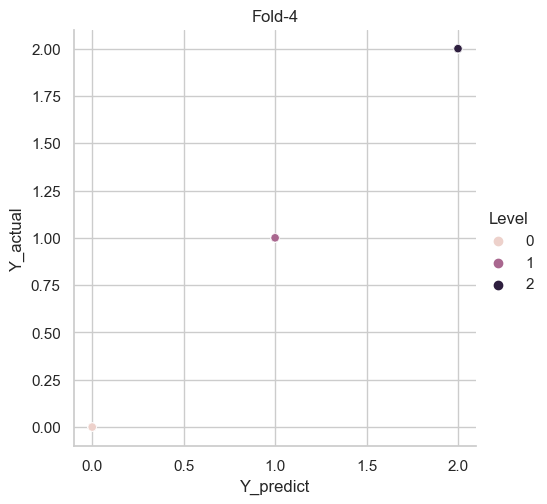

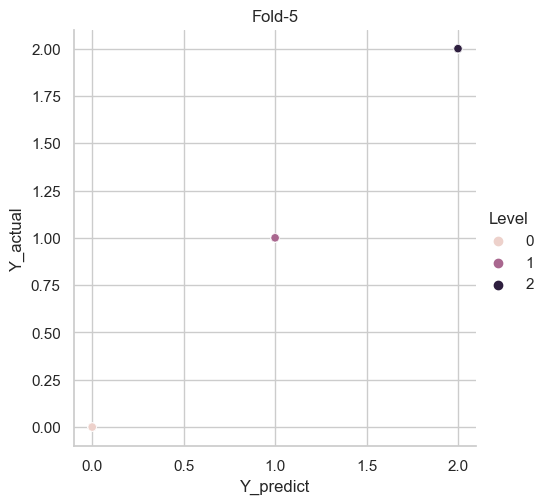

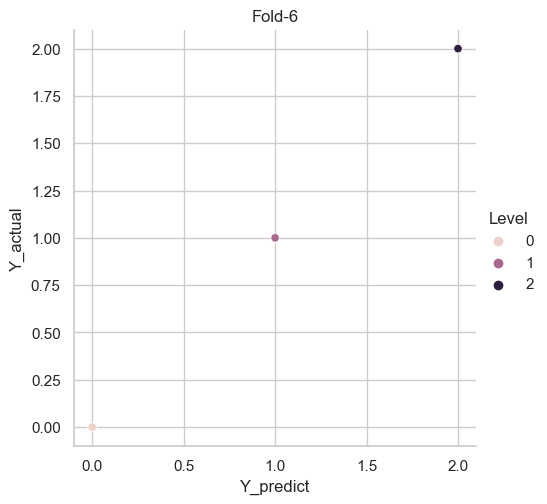

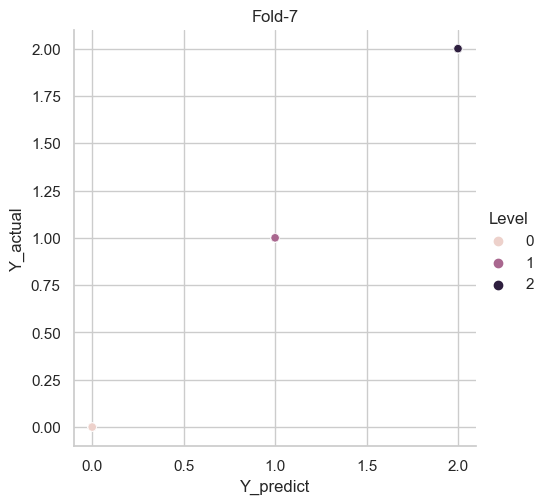

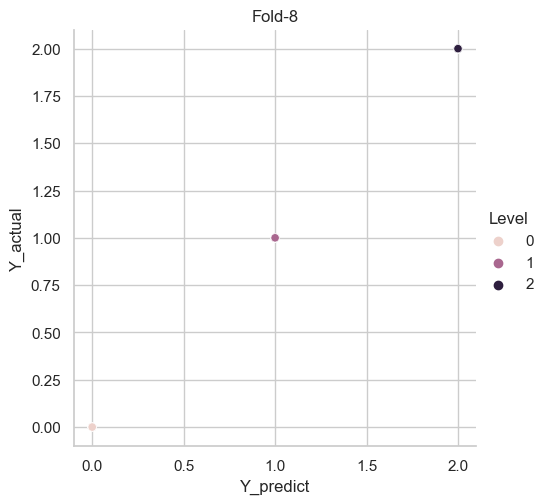

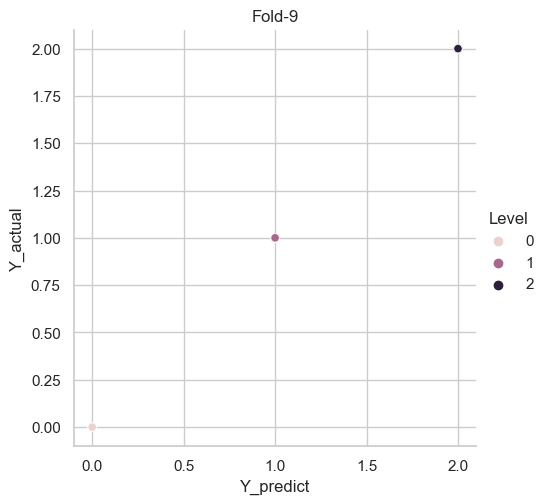

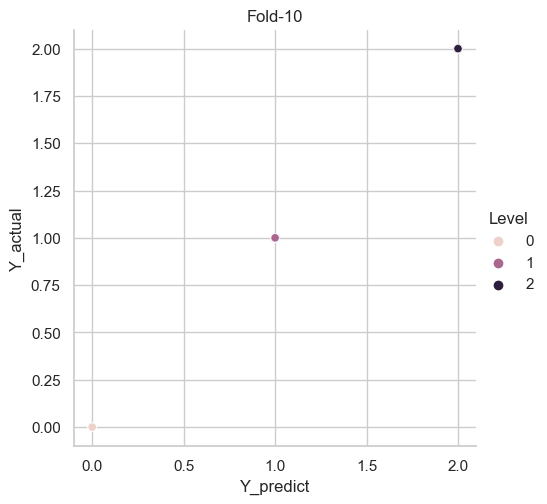

In [43]:
sns.relplot(x=y1_pred, y=y1_test, hue=y1_test)
plt.title("Fold-1")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y2_pred, y=y2_test, hue=y2_test)
plt.title("Fold-2")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y3_pred, y=y3_test, hue=y3_test)
plt.title("Fold-3")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y4_pred, y=y4_test, hue=y4_test)
plt.title("Fold-4")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y5_pred, y=y5_test, hue=y5_test)
plt.title("Fold-5")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y6_pred, y=y6_test, hue=y6_test)
plt.title("Fold-6")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y7_pred, y=y7_test, hue=y7_test)
plt.title("Fold-7")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y8_pred, y=y8_test, hue=y8_test)
plt.title("Fold-8")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y9_pred, y=y9_test, hue=y9_test)
plt.title("Fold-9")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y10_pred, y=y10_test, hue=y10_test)
plt.title("Fold-10")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")
plt.show()

In [44]:
a1 = accuracy_score(y1_test, y1_pred) 
print("Fold-1 Accuracy:", a1*100, "%")
a2 = accuracy_score(y2_test, y2_pred) 
print("Fold-2 Accuracy:", a2*100, "%")
a3 = accuracy_score(y3_test, y3_pred) 
print("Fold-3 Accuracy:", a3*100, "%")
a4 = accuracy_score(y4_test, y4_pred) 
print("Fold-4 Accuracy:", a4*100, "%")
a5 = accuracy_score(y5_test, y5_pred) 
print("Fold-5 Accuracy:", a5*100, "%")
a6 = accuracy_score(y6_test, y6_pred) 
print("Fold-6 Accuracy:", a6*100, "%")
a7 = accuracy_score(y7_test, y7_pred) 
print("Fold-7 Accuracy:", a7*100, "%")
a8 = accuracy_score(y8_test, y8_pred) 
print("Fold-8 Accuracy:", a8*100, "%")
a9 = accuracy_score(y9_test, y9_pred) 
print("Fold-9 Accuracy:", a9*100, "%")
a10 = accuracy_score(y10_test, y10_pred) 
print("Fold-10 Accuracy:", a10*100, "%")

Fold-1 Accuracy: 100.0 %
Fold-2 Accuracy: 100.0 %
Fold-3 Accuracy: 100.0 %
Fold-4 Accuracy: 100.0 %
Fold-5 Accuracy: 100.0 %
Fold-6 Accuracy: 100.0 %
Fold-7 Accuracy: 100.0 %
Fold-8 Accuracy: 100.0 %
Fold-9 Accuracy: 100.0 %
Fold-10 Accuracy: 100.0 %


In [45]:
accuracy = pd.DataFrame(columns=['Fold Number','Accuracy'])
accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-4', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-5', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-6', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-7', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-8', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-9', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-10', 'Accuracy':100.0},ignore_index=True)
accuracy.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':100.0},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':100.0},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':100.0},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:5: FutureWarning: The frame.append method is deprecated and will be remov

,Fold Number,Accuracy
0,Fold-1,100.0
1,Fold-2,100.0
2,Fold-3,100.0
3,Fold-4,100.0
4,Fold-5,100.0
5,Fold-6,100.0
6,Fold-7,100.0
7,Fold-8,100.0
8,Fold-9,100.0
9,Fold-10,100.0


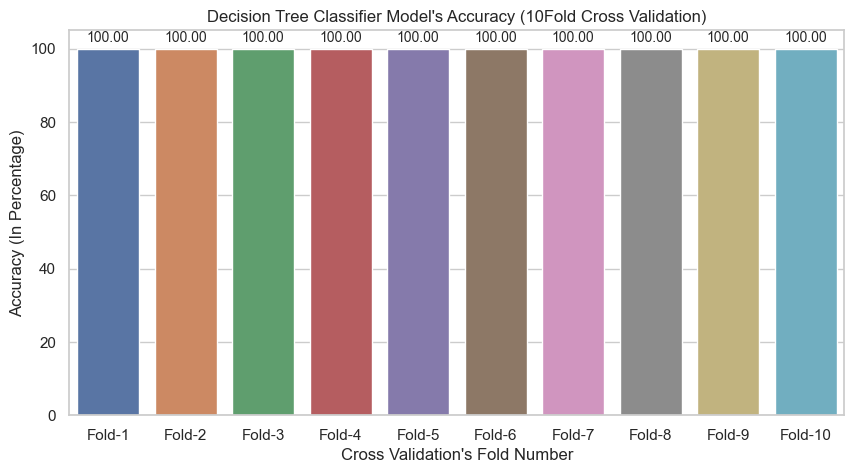

In [46]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x="Fold Number", y="Accuracy", data=accuracy)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Decision Tree Classifier Model's Accuracy (10Fold Cross Validation)")
plt.xlabel("Cross Validation's Fold Number")
plt.ylabel("Accuracy (In Percentage)")
plt.show()

In [47]:
cm1 = np.array(confusion_matrix(y1_test, y1_pred))
cm2 = np.array(confusion_matrix(y2_test, y2_pred))
cm10 = np.array(confusion_matrix(y10_test, y10_pred))
print(cm1,'\n')
print(cm2,'\n')
print(cm10,'\n')

[[ 89   0   0]
 [  0  96   0]
 [  0   0 115]] 

[[ 89   0   0]
 [  0 101   0]
 [  0   0 110]] 

[[ 87   0   0]
 [  0 110   0]
 [  0   0 103]] 



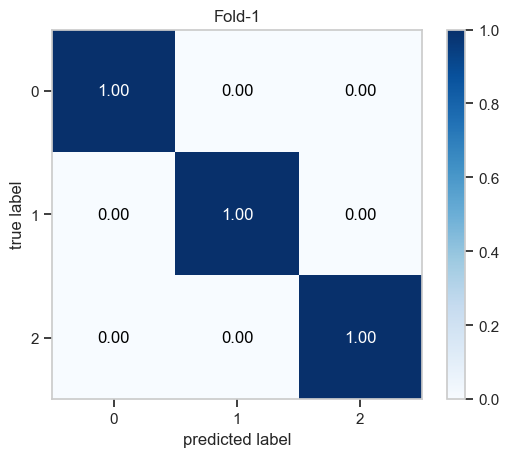

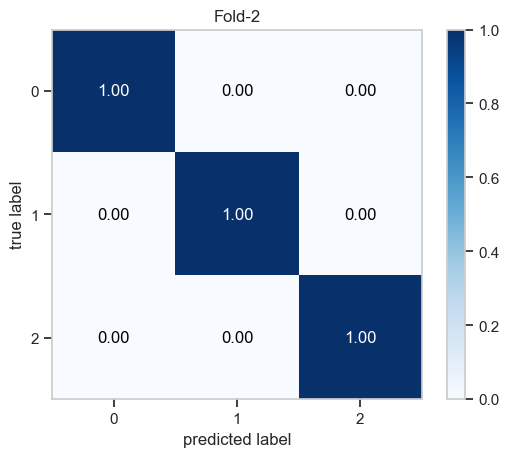

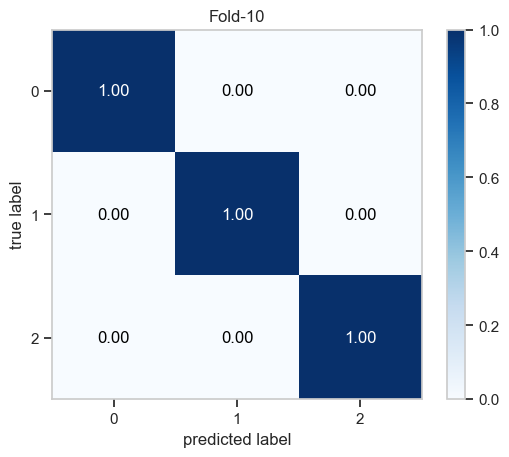

In [48]:
plot_confusion_matrix(conf_mat=cm1,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-1")
plot_confusion_matrix(conf_mat=cm2,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-2")
plot_confusion_matrix(conf_mat=cm10,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-10")
plt.show()

In [49]:
print('Decision Tree Classifier Model Result')
print('-------------------------------------')
gin_mean = accuracy['Accuracy'].mean()
gin_median = accuracy['Accuracy'].median()

print('Mean accuracy:', gin_mean, '%')
print('Median accuracy:', gin_median, '%')

Decision Tree Classifier Model Result
-------------------------------------
Mean accuracy: 100.0 %
Median accuracy: 100.0 %


[Text(0.5, 0.9166666666666666, 'x[13] <= 5.5\ngini = 0.665\nsamples = 700\nvalue = [214, 236, 250]'),
 Text(0.3333333333333333, 0.75, 'x[17] <= 4.5\ngini = 0.521\nsamples = 415\nvalue = [202, 204, 9]'),
 Text(0.25, 0.5833333333333334, 'x[22] <= 4.5\ngini = 0.353\nsamples = 258\nvalue = [202, 47, 9]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[9] <= 4.5\ngini = 0.182\nsamples = 224\nvalue = [202, 13, 9]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 202\nvalue = [202, 0, 0]'),
 Text(0.25, 0.25, 'x[9] <= 5.5\ngini = 0.483\nsamples = 22\nvalue = [0, 13, 9]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.4166666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 157\nvalue = [0, 157, 0]'),
 Text(0.6666666666666666, 0.75, 'x

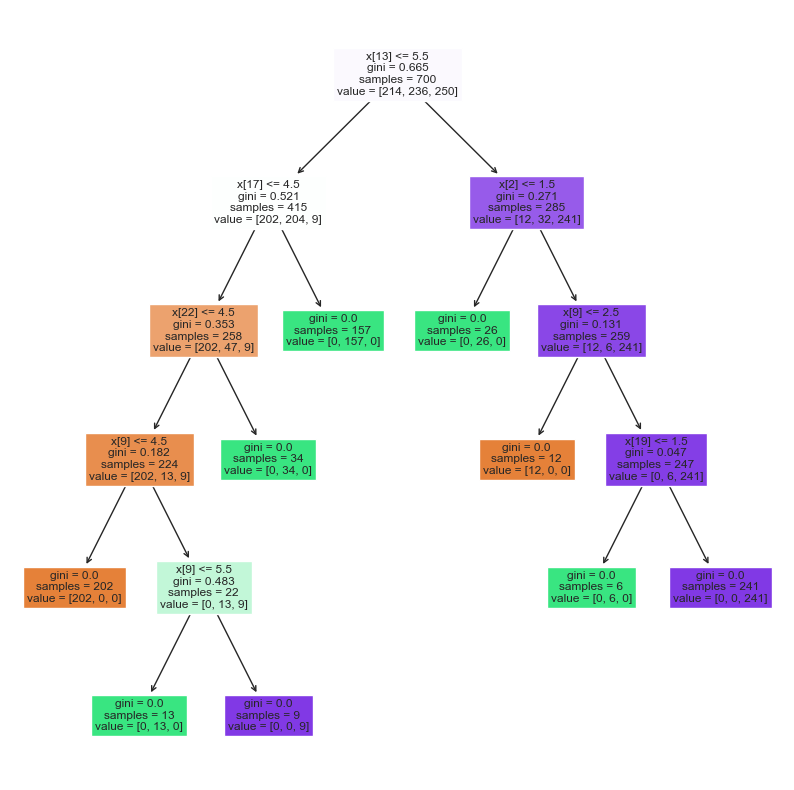

In [50]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(gin1,filled=True)

[Text(0.6607142857142857, 0.9166666666666666, 'x[9] <= 6.5\ngini = 0.665\nsamples = 700\nvalue = [214, 231, 255]'),
 Text(0.4642857142857143, 0.75, 'x[17] <= 4.5\ngini = 0.544\nsamples = 445\nvalue = [214, 210, 21]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[14] <= 3.5\ngini = 0.401\nsamples = 287\nvalue = [214, 57, 16]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[9] <= 4.5\ngini = 0.056\nsamples = 207\nvalue = [201, 6, 0]'),
 Text(0.07142857142857142, 0.25, 'gini = 0.0\nsamples = 201\nvalue = [201, 0, 0]'),
 Text(0.21428571428571427, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.42857142857142855, 0.4166666666666667, 'x[11] <= 6.5\ngini = 0.527\nsamples = 80\nvalue = [13, 51, 16]'),
 Text(0.35714285714285715, 0.25, 'x[9] <= 2.5\ngini = 0.324\nsamples = 64\nvalue = [13, 51, 0]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 51\nvalue =

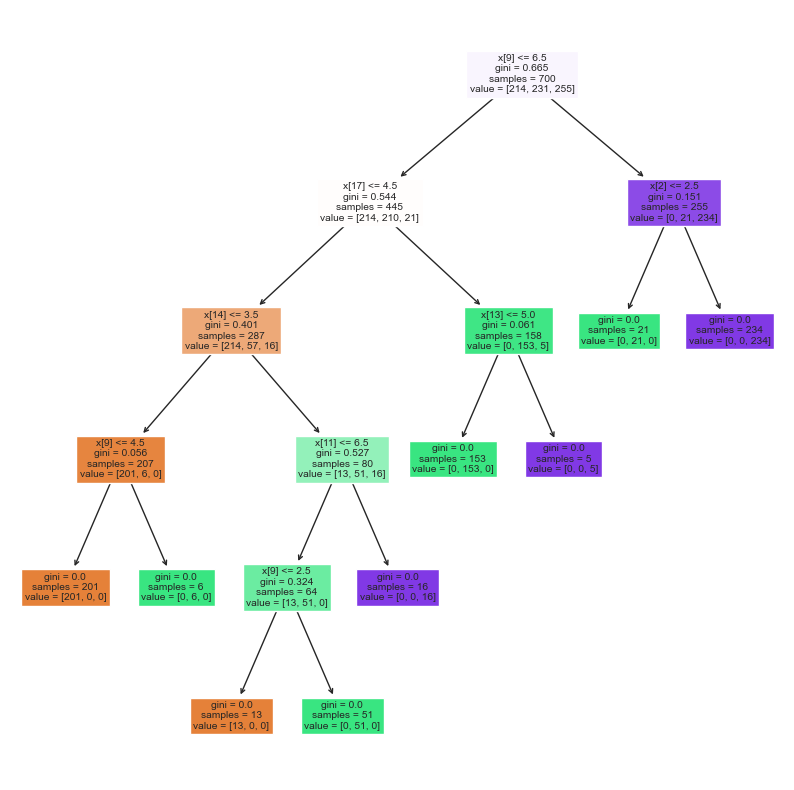

In [52]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(gin2,filled=True)

[Text(0.6, 0.9166666666666666, 'x[13] <= 5.5\ngini = 0.664\nsamples = 700\nvalue = [216, 222, 262]'),
 Text(0.4, 0.75, 'x[17] <= 4.5\ngini = 0.514\nsamples = 401\nvalue = [204, 191, 6]'),
 Text(0.3, 0.5833333333333334, 'x[22] <= 4.5\ngini = 0.336\nsamples = 257\nvalue = [204, 47, 6]'),
 Text(0.2, 0.4166666666666667, 'x[9] <= 4.5\ngini = 0.179\nsamples = 226\nvalue = [204, 16, 6]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 204\nvalue = [204, 0, 0]'),
 Text(0.3, 0.25, 'x[11] <= 6.5\ngini = 0.397\nsamples = 22\nvalue = [0, 16, 6]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 144\nvalue = [0, 144, 0]'),
 Text(0.8, 0.75, 'x[5] <= 7.5\ngini = 0.255\nsamples = 299\nvalue = [12, 31, 256]'),
 Text(0.7, 0.5833333333333334, 'x[9] <= 2.5\ngini = 0.137\

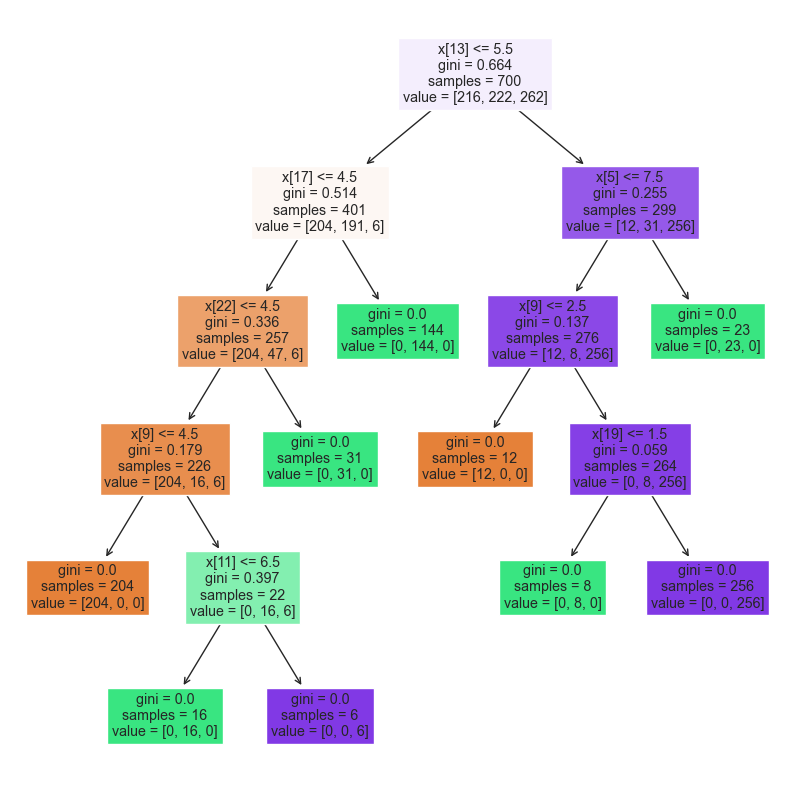

In [51]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(gin10,filled=True)

### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(max_depth=2, random_state=0)
rfc1.fit(x1_train, y1_train)

rfc2 = RandomForestClassifier(max_depth=2, random_state=0)
rfc2.fit(x2_train, y2_train)

rfc3 = RandomForestClassifier(max_depth=2, random_state=0)
rfc3.fit(x3_train, y3_train)

rfc4 = RandomForestClassifier(max_depth=2, random_state=0)
rfc4.fit(x4_train, y4_train)

rfc5 = RandomForestClassifier(max_depth=2, random_state=0)
rfc5.fit(x5_train, y5_train)

rfc6 = RandomForestClassifier(max_depth=2, random_state=0)
rfc6.fit(x6_train, y6_train)

rfc7 = RandomForestClassifier(max_depth=2, random_state=0)
rfc7.fit(x7_train, y7_train)

rfc8 = RandomForestClassifier(max_depth=2, random_state=0)
rfc8.fit(x8_train, y8_train)

rfc9 = RandomForestClassifier(max_depth=2, random_state=0)
rfc9.fit(x9_train, y9_train)

rfc10 = RandomForestClassifier(max_depth=2, random_state=0)
rfc10.fit(x10_train, y10_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
y1_pred = rfc1.predict(x1_test)
y2_pred = rfc2.predict(x2_test)
y3_pred = rfc3.predict(x3_test)
y4_pred = rfc4.predict(x4_test)
y5_pred = rfc5.predict(x5_test)
y6_pred = rfc6.predict(x6_test)
y7_pred = rfc7.predict(x7_test)
y8_pred = rfc8.predict(x8_test)
y9_pred = rfc9.predict(x9_test)
y10_pred = rfc10.predict(x10_test)

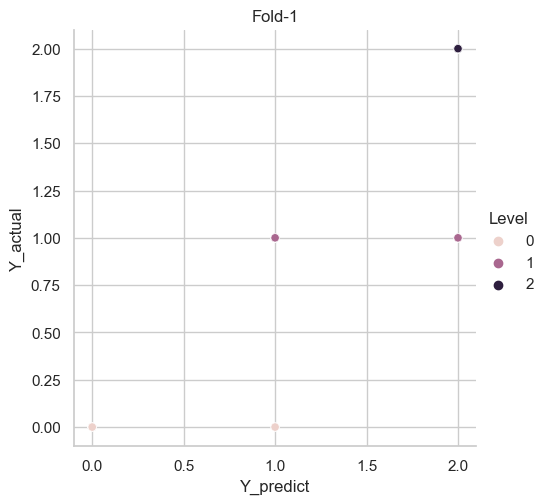

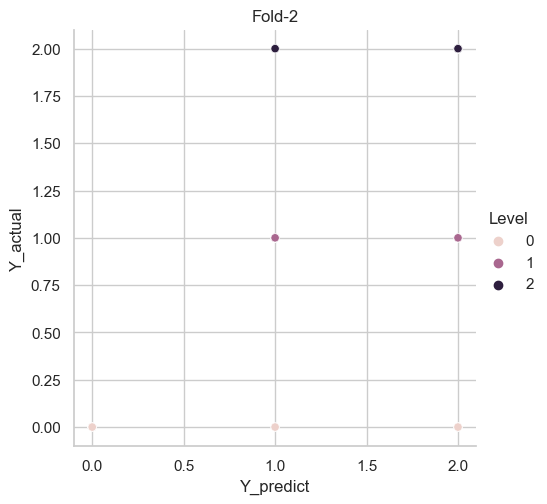

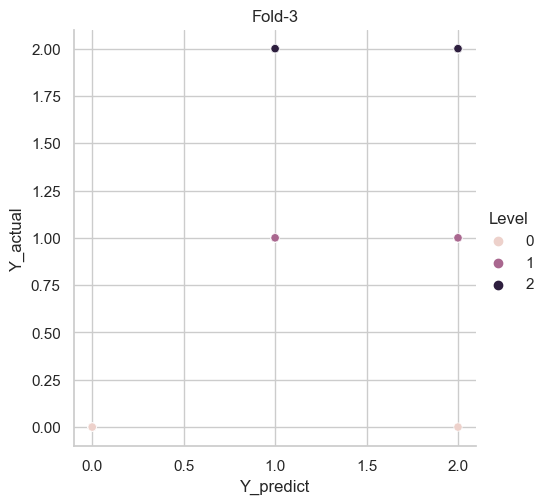

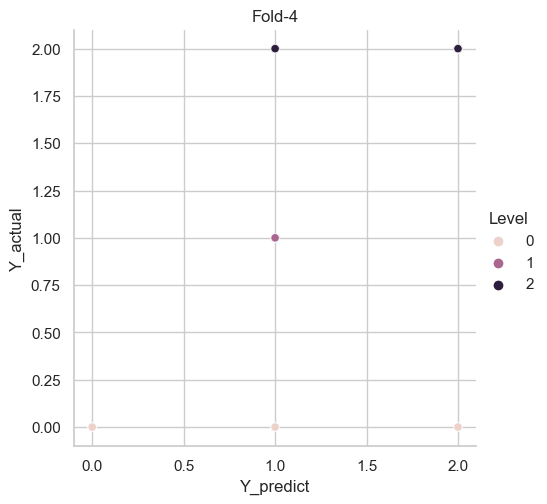

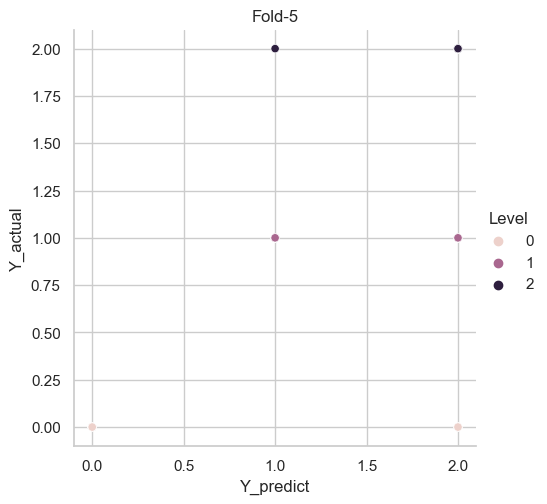

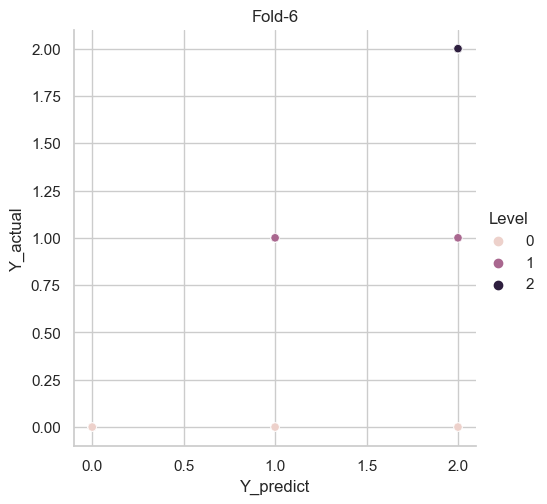

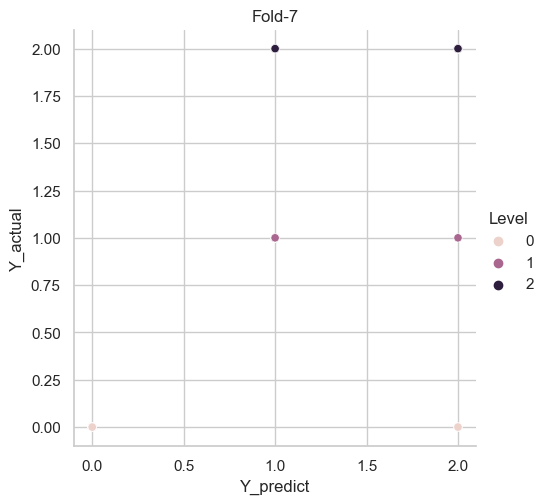

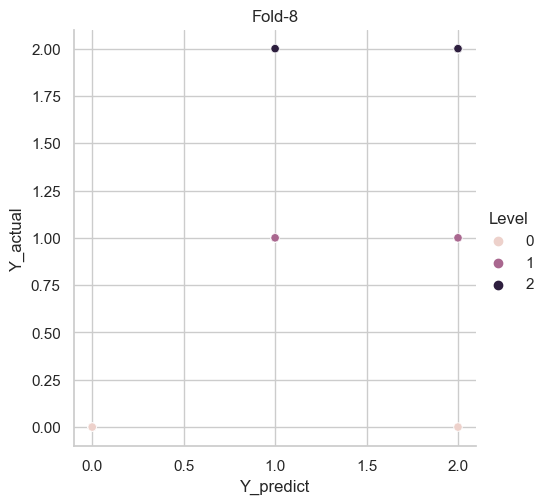

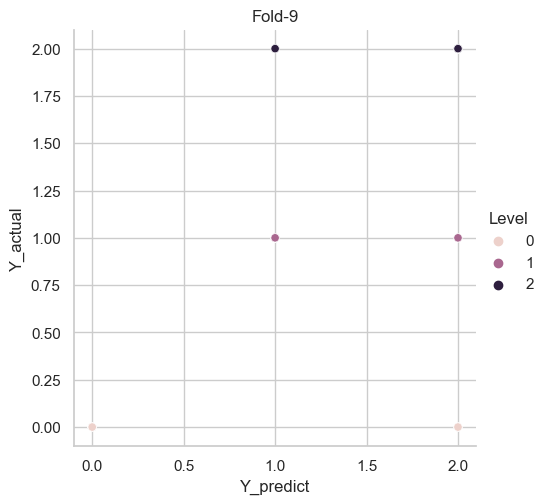

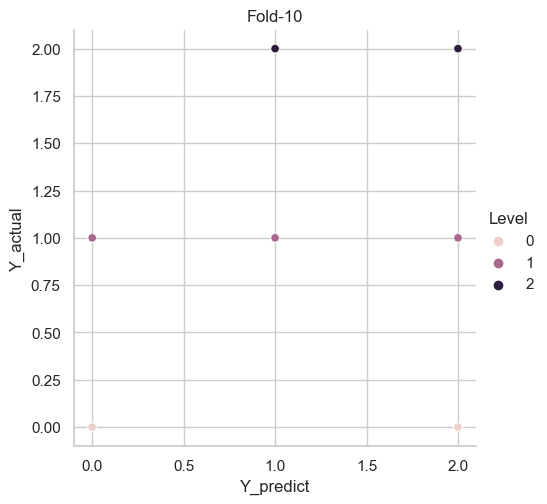

In [55]:
sns.relplot(x=y1_pred, y=y1_test, hue=y1_test)
plt.title("Fold-1")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y2_pred, y=y2_test, hue=y2_test)
plt.title("Fold-2")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y3_pred, y=y3_test, hue=y3_test)
plt.title("Fold-3")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y4_pred, y=y4_test, hue=y4_test)
plt.title("Fold-4")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y5_pred, y=y5_test, hue=y5_test)
plt.title("Fold-5")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y6_pred, y=y6_test, hue=y6_test)
plt.title("Fold-6")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y7_pred, y=y7_test, hue=y7_test)
plt.title("Fold-7")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y8_pred, y=y8_test, hue=y8_test)
plt.title("Fold-8")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y9_pred, y=y9_test, hue=y9_test)
plt.title("Fold-9")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y10_pred, y=y10_test, hue=y10_test)
plt.title("Fold-10")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")
plt.show()

In [56]:
a1 = accuracy_score(y1_test, y1_pred) 
print("Fold-1 Accuracy:", a1*100, "%")
a2 = accuracy_score(y2_test, y2_pred) 
print("Fold-2 Accuracy:", a2*100, "%")
a3 = accuracy_score(y3_test, y3_pred) 
print("Fold-3 Accuracy:", a3*100, "%")
a4 = accuracy_score(y4_test, y4_pred) 
print("Fold-4 Accuracy:", a4*100, "%")
a5 = accuracy_score(y5_test, y5_pred) 
print("Fold-5 Accuracy:", a5*100, "%")
a6 = accuracy_score(y6_test, y6_pred) 
print("Fold-6 Accuracy:", a6*100, "%")
a7 = accuracy_score(y7_test, y7_pred) 
print("Fold-7 Accuracy:", a7*100, "%")
a8 = accuracy_score(y8_test, y8_pred) 
print("Fold-8 Accuracy:", a8*100, "%")
a9 = accuracy_score(y9_test, y9_pred) 
print("Fold-9 Accuracy:", a9*100, "%")
a10 = accuracy_score(y10_test, y10_pred) 
print("Fold-10 Accuracy:", a10*100, "%")

Fold-1 Accuracy: 97.66666666666667 %
Fold-2 Accuracy: 95.66666666666667 %
Fold-3 Accuracy: 96.33333333333334 %
Fold-4 Accuracy: 96.33333333333334 %
Fold-5 Accuracy: 95.66666666666667 %
Fold-6 Accuracy: 96.66666666666667 %
Fold-7 Accuracy: 97.33333333333334 %
Fold-8 Accuracy: 98.0 %
Fold-9 Accuracy: 97.33333333333334 %
Fold-10 Accuracy: 90.66666666666666 %


In [57]:
accuracy = pd.DataFrame(columns=['Fold Number','Accuracy'])
accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':97.66666666666667},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':95.66666666666667},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':96.33333333333334},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-4', 'Accuracy':96.33333333333334},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-5', 'Accuracy':95.66666666666667},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-6', 'Accuracy':96.66666666666667},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-7', 'Accuracy':97.33333333333334},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-8', 'Accuracy':98.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-9', 'Accuracy':97.33333333333334},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-10', 'Accuracy':90.66666666666666},ignore_index=True)
accuracy.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_12760\3583675364.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':97.66666666666667},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\3583675364.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':95.66666666666667},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\3583675364.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':96.33333333333334},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\3583675364.py:5: FutureWarning: The frame.append me

,Fold Number,Accuracy
0,Fold-1,97.666667
1,Fold-2,95.666667
2,Fold-3,96.333333
3,Fold-4,96.333333
4,Fold-5,95.666667
5,Fold-6,96.666667
6,Fold-7,97.333333
7,Fold-8,98.000000
8,Fold-9,97.333333
9,Fold-10,90.666667


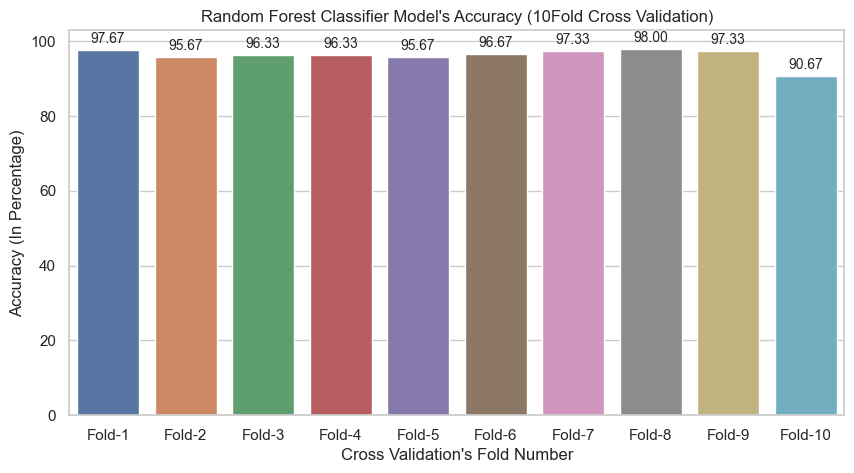

In [58]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x="Fold Number", y="Accuracy", data=accuracy)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Random Forest Classifier Model's Accuracy (10Fold Cross Validation)")
plt.xlabel("Cross Validation's Fold Number")
plt.ylabel("Accuracy (In Percentage)")
plt.show()

In [59]:
cm1 = np.array(confusion_matrix(y1_test, y1_pred))
cm2 = np.array(confusion_matrix(y2_test, y2_pred))
cm3 = np.array(confusion_matrix(y2_test, y2_pred))
cm4 = np.array(confusion_matrix(y2_test, y2_pred))
cm5 = np.array(confusion_matrix(y2_test, y2_pred))
cm6 = np.array(confusion_matrix(y2_test, y2_pred))
cm7 = np.array(confusion_matrix(y2_test, y2_pred))
cm8 = np.array(confusion_matrix(y2_test, y2_pred))
cm9 = np.array(confusion_matrix(y2_test, y2_pred))
cm10 = np.array(confusion_matrix(y10_test, y10_pred))
print(cm1,'\n')
print(cm2,'\n')
print(cm3,'\n')
print(cm4,'\n')
print(cm5,'\n')
print(cm6,'\n')
print(cm7,'\n')
print(cm8,'\n')
print(cm9,'\n')
print(cm10,'\n')

[[ 86   3   0]
 [  0  92   4]
 [  0   0 115]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[ 81   3   5]
 [  0  98   3]
 [  0   2 108]] 

[[83  0  4]
 [18 90  2]
 [ 0  4 99]] 



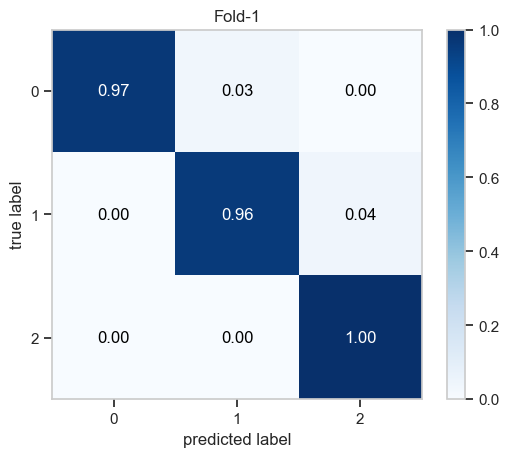

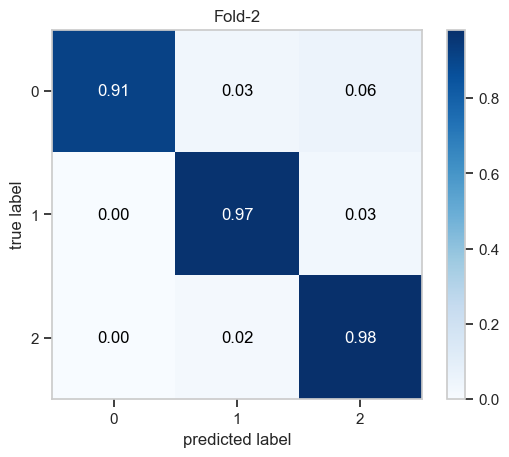

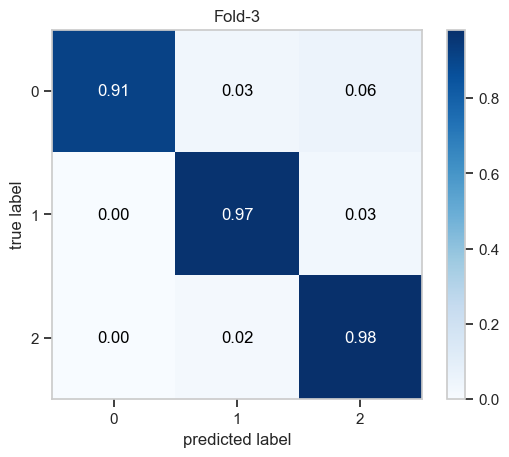

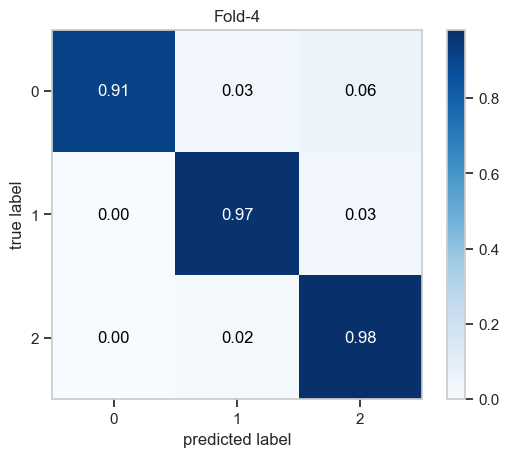

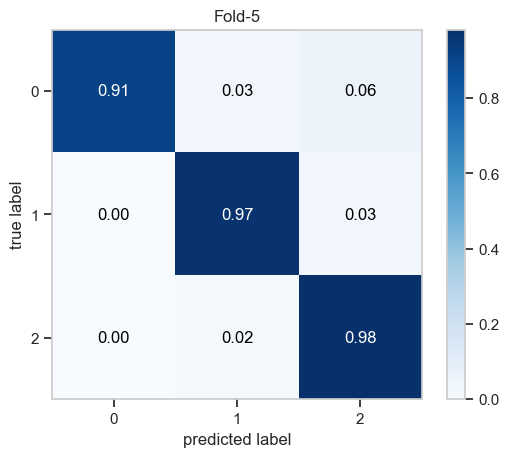

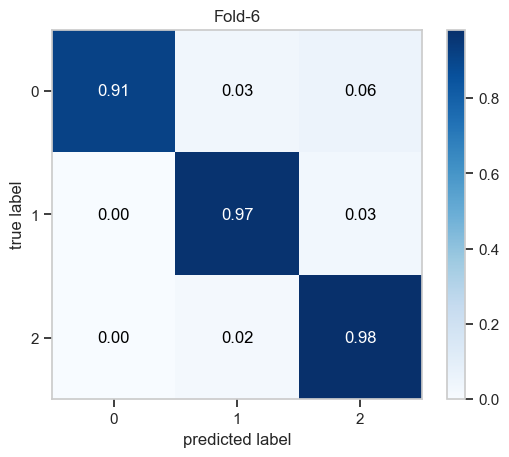

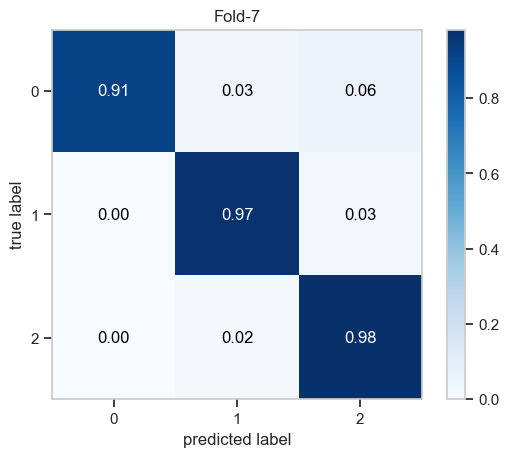

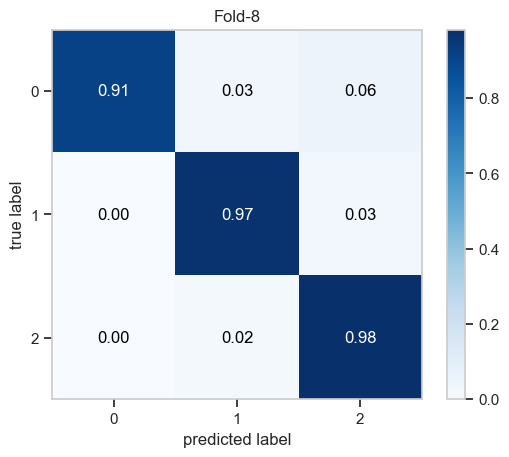

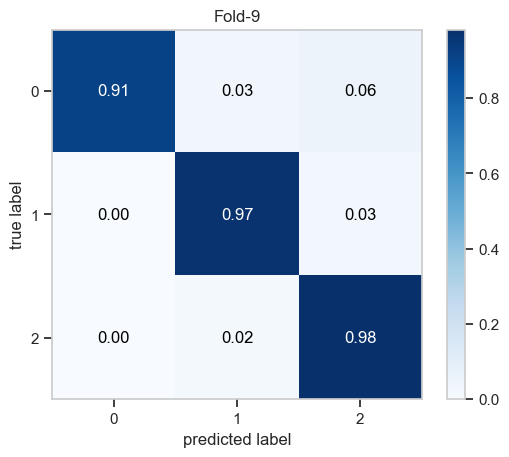

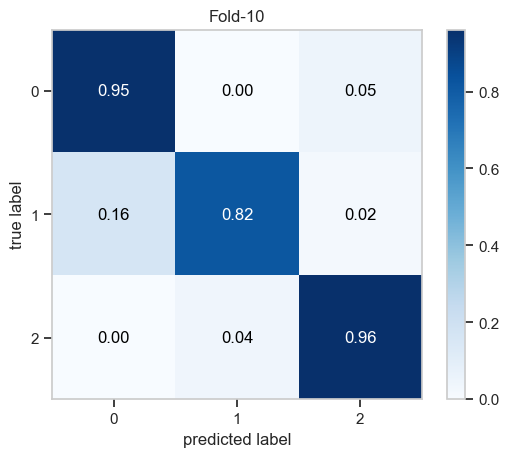

In [60]:
plot_confusion_matrix(conf_mat=cm1,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-1")
plot_confusion_matrix(conf_mat=cm2,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-2")
plot_confusion_matrix(conf_mat=cm3,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-3")
plot_confusion_matrix(conf_mat=cm4,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-4")
plot_confusion_matrix(conf_mat=cm5,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-5")
plot_confusion_matrix(conf_mat=cm6,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-6")
plot_confusion_matrix(conf_mat=cm7,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-7")
plot_confusion_matrix(conf_mat=cm8,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-8")
plot_confusion_matrix(conf_mat=cm9,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-9")
plot_confusion_matrix(conf_mat=cm10,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-10")
plt.show()

In [61]:
print('Random Forest Classifier Model Result')
print('-------------------------------------')
rfc_mean = accuracy['Accuracy'].mean()
rfc_median = accuracy['Accuracy'].median()

print('Mean accuracy:', rfc_mean, '%')
print('Median accuracy:', rfc_median, '%')

Random Forest Classifier Model Result
-------------------------------------
Mean accuracy: 96.16666666666667 %
Median accuracy: 96.5 %


### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression(max_iter=10000)
log1.fit(x1_train, y1_train)

log2 = LogisticRegression(max_iter=10000)
log2.fit(x2_train, y2_train)

log3 = LogisticRegression(max_iter=10000)
log3.fit(x3_train, y3_train)

log4 = LogisticRegression(max_iter=10000)
log4.fit(x4_train, y4_train)

log5 = LogisticRegression(max_iter=10000)
log5.fit(x5_train, y5_train)

log6 = LogisticRegression(max_iter=10000)
log6.fit(x6_train, y6_train)

log7 = LogisticRegression(max_iter=10000)
log7.fit(x7_train, y7_train)

log8 = LogisticRegression(max_iter=10000)
log8.fit(x8_train, y8_train)

log9 = LogisticRegression(max_iter=10000)
log9.fit(x9_train, y9_train)

log10 = LogisticRegression(max_iter=10000)
log10.fit(x10_train, y10_train)

LogisticRegression(max_iter=10000)

In [63]:
y1_pred = log1.predict(x1_test)
y2_pred = log2.predict(x2_test)
y3_pred = log3.predict(x3_test)
y4_pred = log4.predict(x4_test)
y5_pred = log5.predict(x5_test)
y6_pred = log6.predict(x6_test)
y7_pred = log7.predict(x7_test)
y8_pred = log8.predict(x8_test)
y9_pred = log9.predict(x9_test)
y10_pred = log10.predict(x10_test)

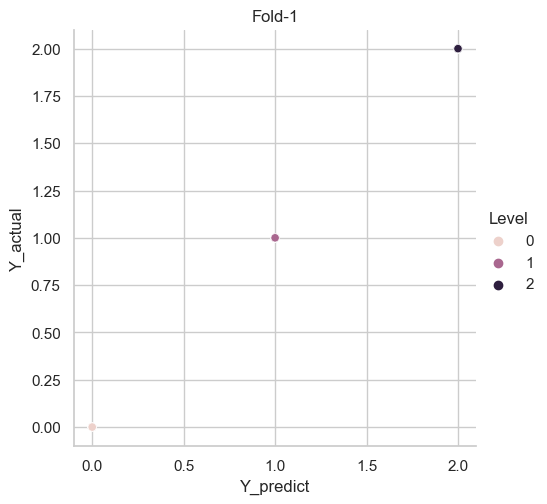

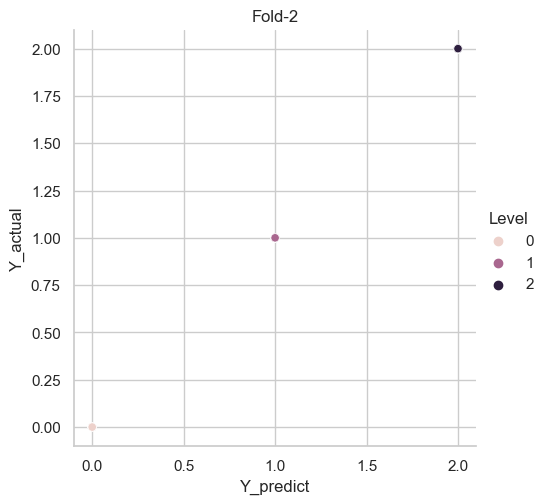

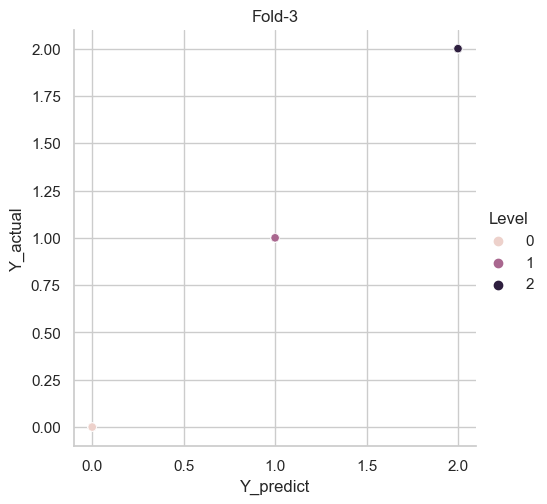

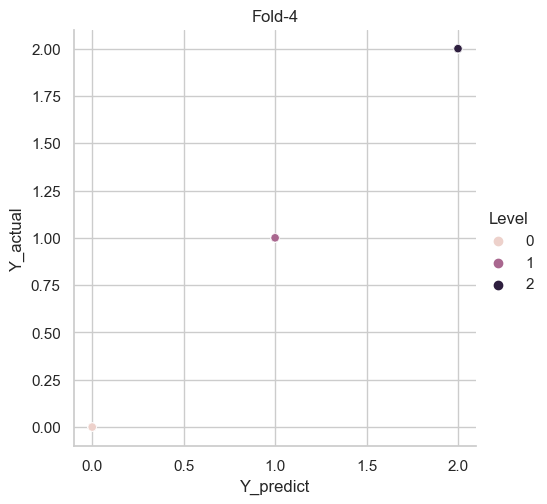

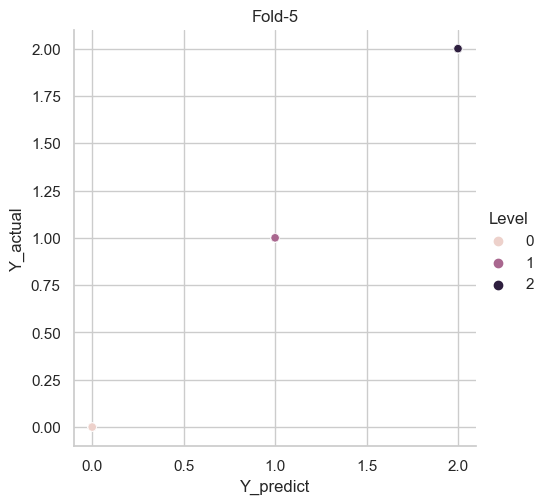

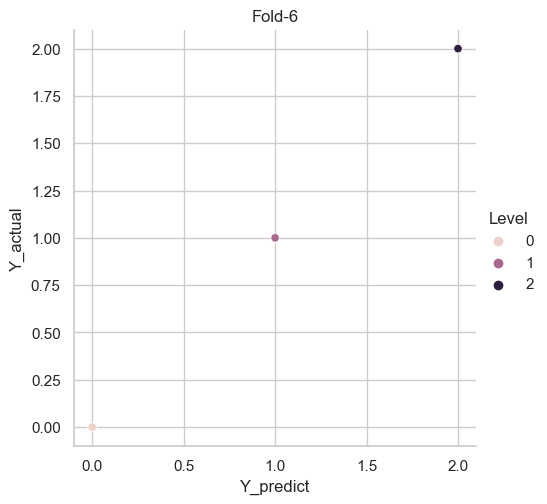

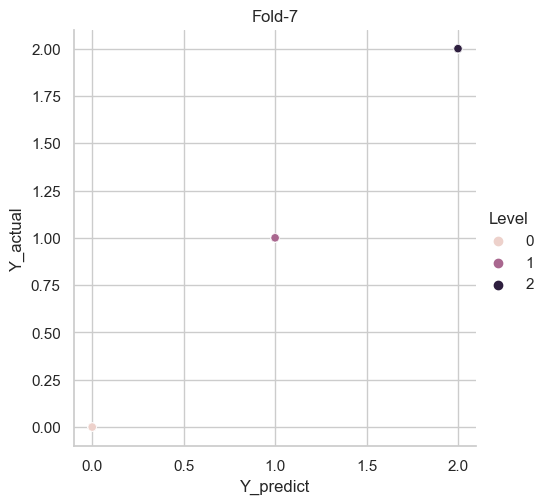

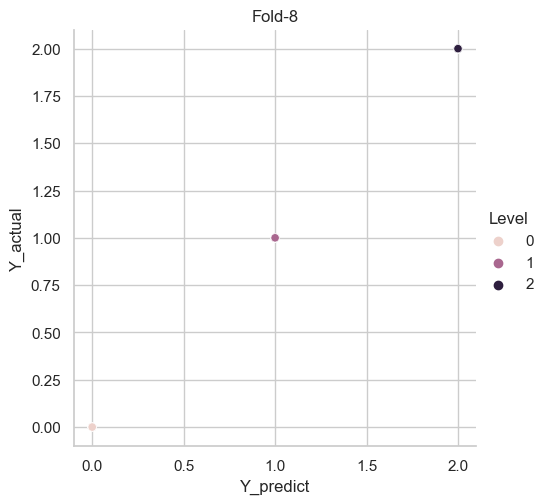

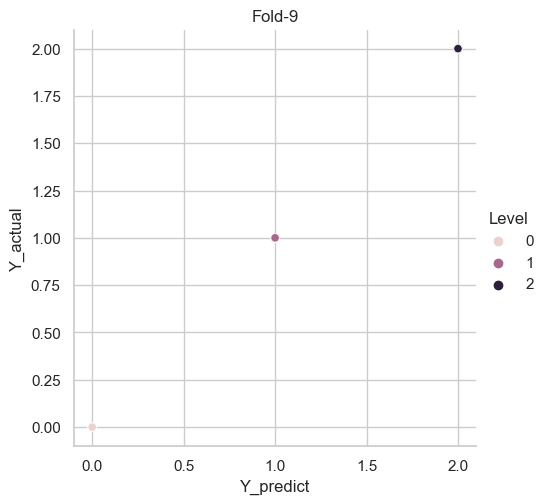

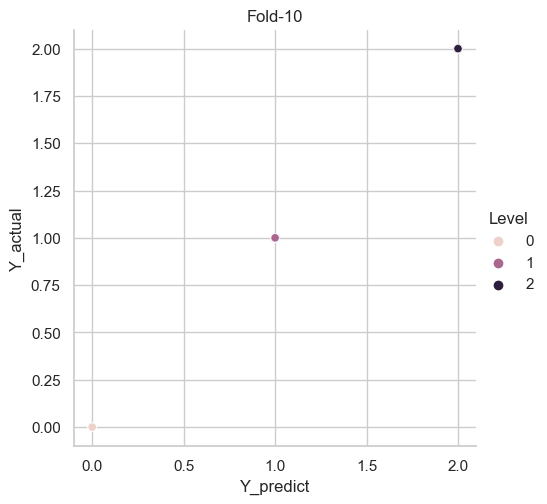

In [64]:
sns.relplot(x=y1_pred, y=y1_test, hue=y1_test)
plt.title("Fold-1")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y2_pred, y=y2_test, hue=y2_test)
plt.title("Fold-2")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y3_pred, y=y3_test, hue=y3_test)
plt.title("Fold-3")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y4_pred, y=y4_test, hue=y4_test)
plt.title("Fold-4")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y5_pred, y=y5_test, hue=y5_test)
plt.title("Fold-5")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y6_pred, y=y6_test, hue=y6_test)
plt.title("Fold-6")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y7_pred, y=y7_test, hue=y7_test)
plt.title("Fold-7")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y8_pred, y=y8_test, hue=y8_test)
plt.title("Fold-8")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y9_pred, y=y9_test, hue=y9_test)
plt.title("Fold-9")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")

sns.relplot(x=y10_pred, y=y10_test, hue=y10_test)
plt.title("Fold-10")
plt.xlabel("Y_predict")
plt.ylabel("Y_actual")
plt.show()

In [65]:
a1 = accuracy_score(y1_test, y1_pred) 
print("Fold-1 Accuracy:", a1*100, "%")
a2 = accuracy_score(y2_test, y2_pred) 
print("Fold-2 Accuracy:", a2*100, "%")
a3 = accuracy_score(y3_test, y3_pred) 
print("Fold-3 Accuracy:", a3*100, "%")
a4 = accuracy_score(y4_test, y4_pred) 
print("Fold-4 Accuracy:", a4*100, "%")
a5 = accuracy_score(y5_test, y5_pred) 
print("Fold-5 Accuracy:", a5*100, "%")
a6 = accuracy_score(y6_test, y6_pred) 
print("Fold-6 Accuracy:", a6*100, "%")
a7 = accuracy_score(y7_test, y7_pred) 
print("Fold-7 Accuracy:", a7*100, "%")
a8 = accuracy_score(y8_test, y8_pred) 
print("Fold-8 Accuracy:", a8*100, "%")
a9 = accuracy_score(y9_test, y9_pred) 
print("Fold-9 Accuracy:", a9*100, "%")
a10 = accuracy_score(y10_test, y10_pred) 
print("Fold-10 Accuracy:", a10*100, "%")

Fold-1 Accuracy: 100.0 %
Fold-2 Accuracy: 100.0 %
Fold-3 Accuracy: 100.0 %
Fold-4 Accuracy: 100.0 %
Fold-5 Accuracy: 100.0 %
Fold-6 Accuracy: 100.0 %
Fold-7 Accuracy: 100.0 %
Fold-8 Accuracy: 100.0 %
Fold-9 Accuracy: 100.0 %
Fold-10 Accuracy: 100.0 %


In [66]:
accuracy = pd.DataFrame(columns=['Fold Number','Accuracy'])
accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-4', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-5', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-6', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-7', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-8', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-9', 'Accuracy':100.0},ignore_index=True)
accuracy=accuracy.append({'Fold Number':'Fold-10', 'Accuracy':100.0},ignore_index=True)
accuracy.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-1', 'Accuracy':100.0},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-2', 'Accuracy':100.0},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy=accuracy.append({'Fold Number':'Fold-3', 'Accuracy':100.0},ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\2245735502.py:5: FutureWarning: The frame.append method is deprecated and will be remov

,Fold Number,Accuracy
0,Fold-1,100.0
1,Fold-2,100.0
2,Fold-3,100.0
3,Fold-4,100.0
4,Fold-5,100.0
5,Fold-6,100.0
6,Fold-7,100.0
7,Fold-8,100.0
8,Fold-9,100.0
9,Fold-10,100.0


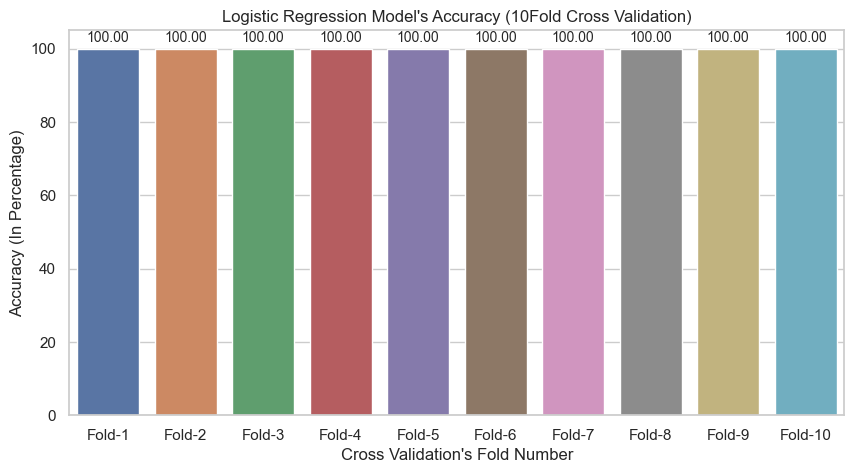

In [67]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x="Fold Number", y="Accuracy", data=accuracy)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Logistic Regression Model's Accuracy (10Fold Cross Validation)")
plt.xlabel("Cross Validation's Fold Number")
plt.ylabel("Accuracy (In Percentage)")
plt.show()

In [68]:
cm1 = np.array(confusion_matrix(y1_test, y1_pred))
cm2 = np.array(confusion_matrix(y2_test, y2_pred))
cm10 = np.array(confusion_matrix(y10_test, y10_pred))
print(cm1,'\n')
print(cm2,'\n')
print(cm10,'\n')

[[ 89   0   0]
 [  0  96   0]
 [  0   0 115]] 

[[ 89   0   0]
 [  0 101   0]
 [  0   0 110]] 

[[ 87   0   0]
 [  0 110   0]
 [  0   0 103]] 



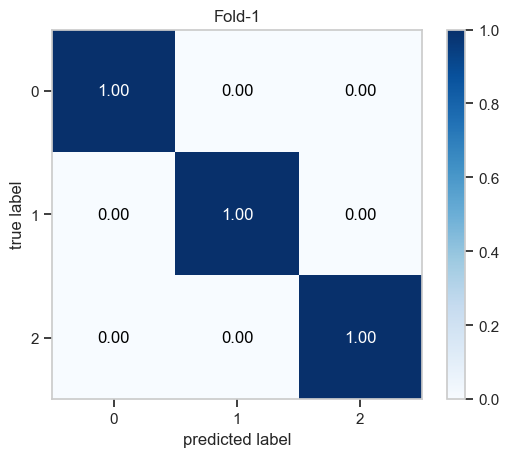

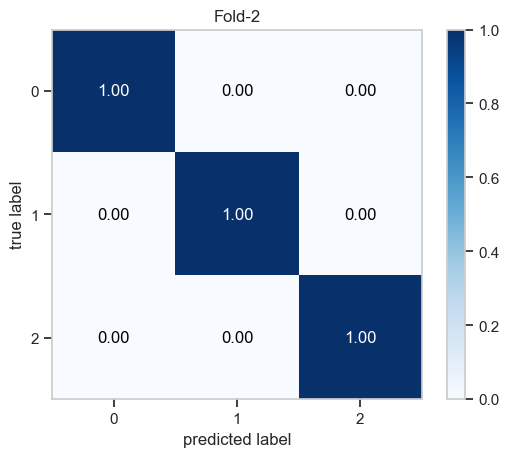

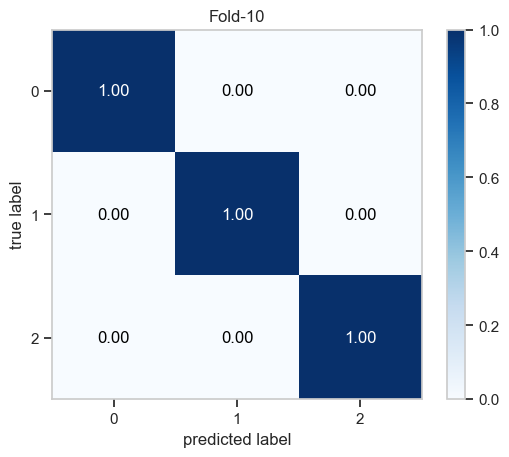

In [69]:
plot_confusion_matrix(conf_mat=cm1,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-1")
plot_confusion_matrix(conf_mat=cm2,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-2")
plot_confusion_matrix(conf_mat=cm10,colorbar=True,show_absolute=False,show_normed=True)
plt.title("Fold-10")
plt.show()

In [70]:
print('Logistic Regression Model Result')
print('-------------------------------------')
log_mean = accuracy['Accuracy'].mean()
log_median = accuracy['Accuracy'].median()

print('Mean accuracy:', log_mean, '%')
print('Median accuracy:', log_median, '%')

Logistic Regression Model Result
-------------------------------------
Mean accuracy: 100.0 %
Median accuracy: 100.0 %


In [71]:
comp = pd.DataFrame(columns=['Classification Algorithm','Mean Accuracy', 'Median Accuracy'])
comp=comp.append({'Classification Algorithm':'Simple Linear Regression', 
                  'Mean Accuracy':91.75887451174523, 'Median Accuracy':91.99309135852711},ignore_index=True)
comp=comp.append({'Classification Algorithm':'Decision Tree Classifier', 
                  'Mean Accuracy':100.0, 'Median Accuracy':100.0},ignore_index=True)
comp=comp.append({'Classification Algorithm':'Random Forest Classifier', 
                  'Mean Accuracy':96.16666666666667, 'Median Accuracy':96.5},ignore_index=True)
comp=comp.append({'Classification Algorithm':'Logistic Regression', 
                  'Mean Accuracy':100.0, 'Median Accuracy':100.0},ignore_index=True)
comp.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_12760\1241620479.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp=comp.append({'Classification Algorithm':'Simple Linear Regression',
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\1241620479.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp=comp.append({'Classification Algorithm':'Decision Tree Classifier',
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\1241620479.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp=comp.append({'Classification Algorithm':'Random Forest Classifier',
C:\Users\USER\AppData\Local\Temp\ipykernel_12760\1241620479.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

,Classification Algorithm,Mean Accuracy,Median Accuracy
0,Simple Linear Regression,91.758875,91.993091
1,Decision Tree Classifier,100.000000,100.000000
2,Random Forest Classifier,96.166667,96.500000
3,Logistic Regression,100.000000,100.000000


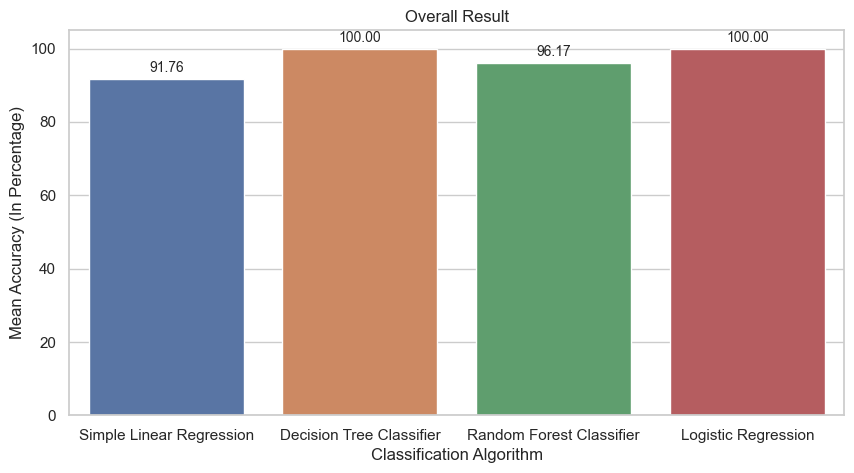

In [72]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x="Classification Algorithm", y="Mean Accuracy", data=comp)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Overall Result")
plt.xlabel("Classification Algorithm")
plt.ylabel("Mean Accuracy (In Percentage)")
plt.show()

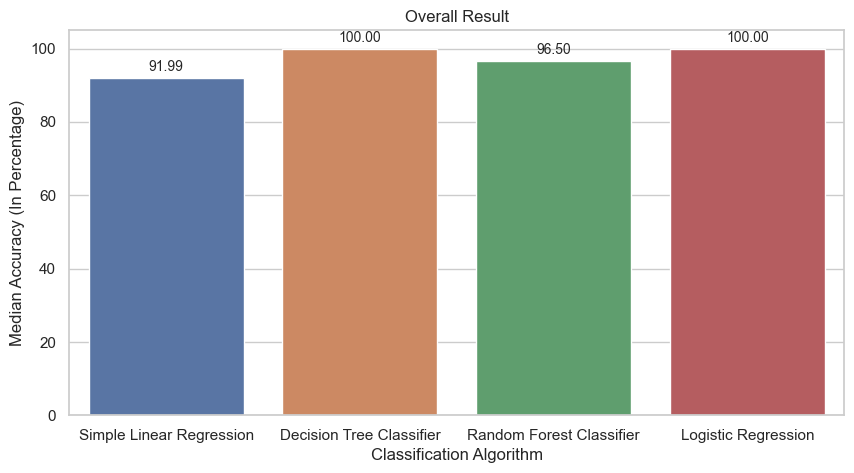

In [73]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x="Classification Algorithm", y="Median Accuracy", data=comp)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Overall Result")
plt.xlabel("Classification Algorithm")
plt.ylabel("Median Accuracy (In Percentage)")
plt.show()